In [1]:
import os

In [2]:
data_dir = "F:\\Datasets\\cell_images"

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from matplotlib.image import imread


In [6]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [7]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [8]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [9]:
paracell = train_path+'parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'
imread(paracell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [10]:
imread(paracell).shape

(148, 142, 3)

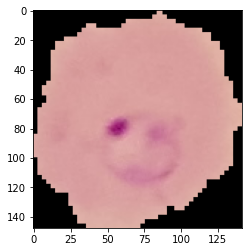

In [11]:
plt.imshow(imread(paracell))

In [12]:
os.listdir(train_path+'\\uninfected\\')[0]


'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [13]:
uninfected_cell = imread(train_path+'\\uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png')

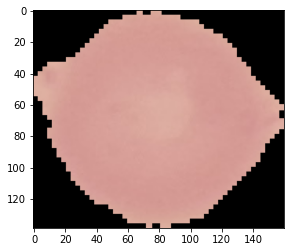

In [14]:
plt.imshow(uninfected_cell)

In [15]:
len(os.listdir(train_path+'parasitized'))

12480

In [16]:
len(os.listdir(train_path+'uninfected'))

12480

In [17]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    img = imread(test_path+'uninfected\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

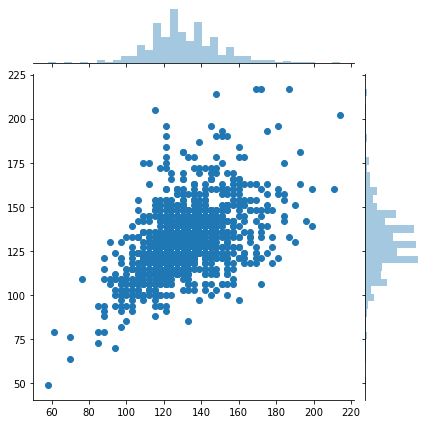

In [18]:
sns.jointplot(dim1,dim2)

In [19]:
np.mean(dim1)

130.92538461538462

In [20]:
np.mean(dim2)

130.75

In [21]:
image_shape = (130,130,3)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1,height_shift_range=0.1,
                                shear_range=0.1,zoom_range=0.1,horizontal_flip=True,
                                fill_mode='nearest')

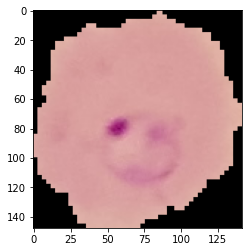

In [24]:
plt.imshow(imread(paracell))

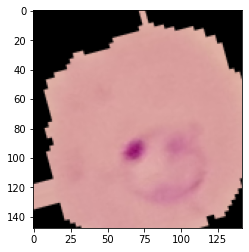

In [25]:
plt.imshow(image_gen.random_transform(imread(paracell)))

In [26]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [27]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [29]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss',patience=5,verbose=1)

In [33]:
batch_size = 16

In [34]:
train_img_gen = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size,class_mode='binary')
test_img_gen = image_gen.flow_from_directory(test_path,target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size,class_mode='binary',shuffle=False)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [35]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [36]:
results = model.fit_generator(train_img_gen,epochs=20,validation_data=test_img_gen,callbacks=[early_stop]) 

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1560 steps, validate for 163 steps
Epoch 1/20
1560/1560 [==============================] - 460s 295ms/step - loss: 0.8830 - accuracy: 0.5397 - val_loss: 0.6836 - val_accuracy: 0.5512

In [37]:
losses = pd.DataFrame(model.history.history)

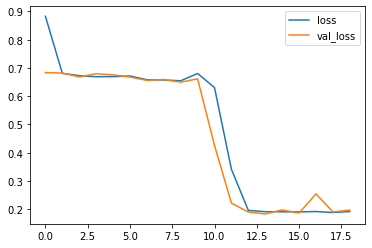

In [38]:
losses[['loss','val_loss']].plot()

In [39]:
model.evaluate_generator(test_img_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']


[0.19825656158975297, 0.9346154]

In [40]:
model.metrics_names

['loss', 'accuracy']

In [41]:
pred = model.predict_generator(test_img_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [58]:
pred

array([[0.26718676],
       [0.002437  ],
       [0.00693973],
       ...,
       [0.9451281 ],
       [0.9421618 ],
       [0.9574219 ]], dtype=float32)

In [42]:
prediction=pred>0.5

In [43]:
prediction

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [44]:
len(pred)

2600

In [60]:
test_img_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(classification_report(test_img_gen.classes,prediction))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1300
           1       0.91      0.97      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [47]:
test_img_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [48]:
confusion_matrix(test_img_gen.classes,prediction)

array([[1177,  123],
       [  45, 1255]], dtype=int64)

In [49]:
paracell

'F:\\Datasets\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [50]:
from tensorflow.keras.preprocessing import image

In [51]:
my_img = image.load_img(paracell,target_size=image_shape)

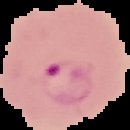

In [52]:
my_img

In [53]:
my_img_arr = image.img_to_array(my_img)

In [54]:
my_img_arr.shape

(130, 130, 3)

In [55]:
my_img_arr = np.expand_dims(my_img,axis=0)    #my_img_arr.reshape(1,130,130,3)

In [56]:
my_img_arr.shape

(1, 130, 130, 3)

In [57]:
model.predict(my_img_arr)

array([[0.00979039]], dtype=float32)